In [ ]:
#1Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#2import danych

In [2]:
df = pd.read_csv(r"C:\Dane\2_ML_Projekty\003_programowanie_ML_zadanka_kurs_wprowadzenie\Moduł 4\Zbiory danych\Mall_customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Spending Score index przypisany klientom przez centrum handlowe na podstawie wydatków i zachowań

In [ ]:
#3.Analiza danych

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#nie ma brakujacych obserwacji Non-Null wszystkie typy danych się zgadzaja

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#jak kształtuja się dane

In [ ]:
#Celem analizy jest pogrupowanie klientów na kilka grup,które będą jednorodne wzgledem siebie i różne od siebie(grupy)

In [ ]:
#Relacje między zmiennymi ilościowymi

In [ ]:
#funkcja pairplot relacje między zmiennymi ilościowymi

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


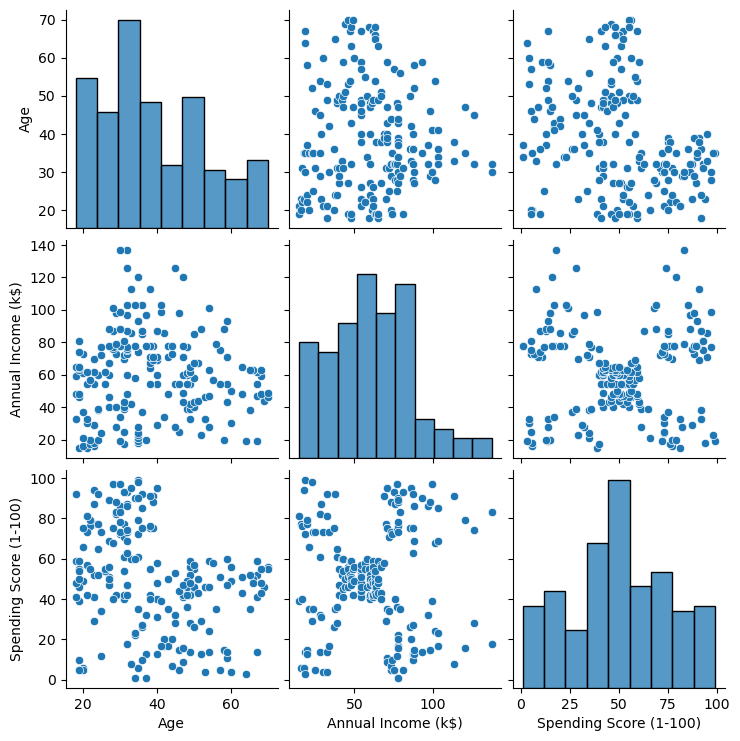

In [7]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [ ]:
#na głownej prekątnej histogramy ale nas interesują bardziej wykresy rozrzutu

In [ ]:
#Dla wykresu Annual Income od spending score mamy kilka skupisk (wykres rzad wiersz 2 kol 3)

In [ ]:
#Możliwe, że istnieje kilka jednorodnych grup na które możemy podzielic naszych klientów. 
#Algorytm K-Means może miec tu sens i dac podpowiedź ile klastrów zbudować. Widać 5 grup i tyle zbudujemy. 
#Czasem nie jest to tak oczywiste i wizualizacja 2d nie wystarczy.

In [ ]:
#4 budowa modelu

In [8]:
from sklearn.cluster import KMeans

In [ ]:
#funkcja KMeans przyjmuje argument liczbe klastrów

kmeans = KMeans(n_clusters=5)

In [ ]:
#Trzeba teraz dopasowac model do naszych danych stosujemy metode Fit na zmiennych na ktorych wykrylismyz aleznosć

In [10]:
kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
#Sprawdzamy,który klaster przypisano do której obserwacji

In [11]:
kmeans.labels_

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [ ]:
#5 klastrów od zera do 4 i dla każdego numeru klastra przypisana jest odpowiednia grupa

In [ ]:
#Przypisujemy te dane do zmiennej i dołaczmy na koniec do nasych danych

In [12]:
df['Cluster'] = kmeans.labels_

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [ ]:
#Weryfikacja podziału na klastry. Grupujemy dane po danym klastrze i wyliczamy średnią zmiennych które brały udział w uczeniu

In [ ]:
#Dzielimy za pomoca metody groupby agg dla zmiennej 'Annual Income (k$)' wartosc srednia

In [14]:
df.groupby('Cluster').agg({'Annual Income (k$)':['mean'],
                          'Spending Score (1-100)':['mean']})

,Annual Income (k$),Spending Score (1-100)
,mean,mean
Cluster,,
0,86.538462,82.128205
1,25.727273,79.363636
2,88.200000,17.114286
3,26.304348,20.913043
4,55.296296,49.518519


In [ ]:
#najniżse średnie dochody sa odnotowane w klastrze 1 i amy wysoka srednią wydatków bo drugą od góry


In [15]:
df['Cluster'].value_counts()

Cluster
4    81
0    39
2    35
3    23
1    22
Name: count, dtype: int64

In [ ]:
#do klastra nr 4 wpadło najwiecej obserwacji

In [ ]:
#6 Wizualizacja danych poklastrowych

In [ ]:
#Tworzymy wykres rozrzutu miedzy tymi dwoma zmiennymi i nanieśc na to identyfikator klastra i zobaczyc jak one sie kształtują


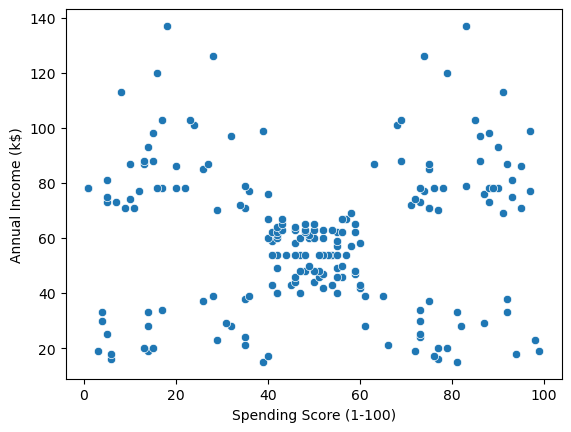

In [17]:
sns.scatterplot(x ='Spending Score (1-100)', y ='Annual Income (k$)', data=df)
plt.show()

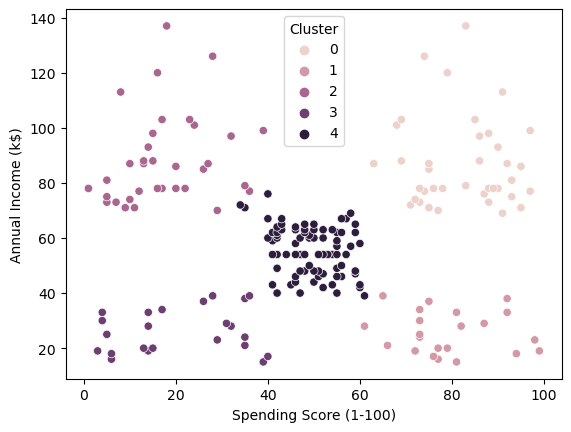

In [18]:
sns.scatterplot(x ='Spending Score (1-100)', y ='Annual Income (k$)', hue='Cluster', data=df)
plt.show()

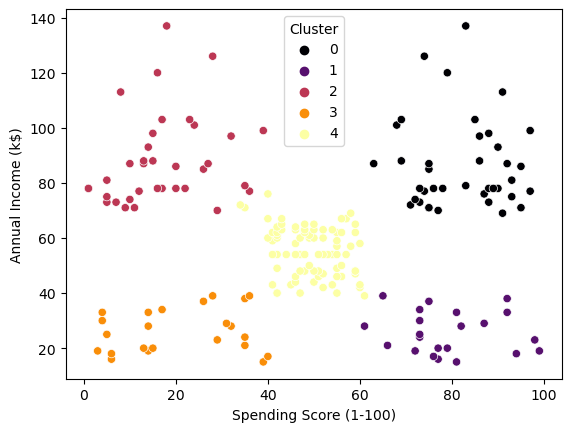

In [20]:
sns.scatterplot(x ='Spending Score (1-100)', y ='Annual Income (k$)', hue='Cluster', data=df, palette='inferno')
plt.show()

In [ ]:
#widac róznice między klastrami. 5 grup jednorodnych wewnatrz a róznych od siebie.